### Streetlight Model Baseline

Here is a first run of the CNN on the dataset. It includes 4 different classes, the 3 different street light types (ENCL, OPEN, COL) and a class for images with no street light shown.

### Import Libraries

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
!unzip "/content/Clean_Classes.zip"

In [ ]:
data_dir = "/content/Clean_Classes/"
data_directory = pathlib.Path(data_dir)

In [ ]:
col_dir = pathlib.Path(data_dir).joinpath('Colonial Streetlights')
enc_dir = pathlib.Path(data_dir).joinpath('Enclosed Streetlights')
non_dir = pathlib.Path(data_dir).joinpath('Non-Streetlights')
open_dir = pathlib.Path(data_dir).joinpath('Open Streetlights')

In [ ]:
col_dir

PosixPath('/content/Clean_Classes/Colonial Streetlights')

In [ ]:
col_count = len(list(col_dir.glob('*.jpg')))
enc_count = len(list(enc_dir.glob('*.jpg')))
non_count = len(list(non_dir.glob('*.jpg')))
open_count = len(list(open_dir.glob('*.jpg')))
print("Colonial Count: ", col_count)
print("Enclosed Count: ", enc_count)
print("No Light Count: ", non_count)
print("Open Count: ", open_count)

Colonial Count:  411
Enclosed Count:  1035
No Light Count:  471
Open Count:  90


In [ ]:
COL_light = list(col_dir.glob('*.jpg'))

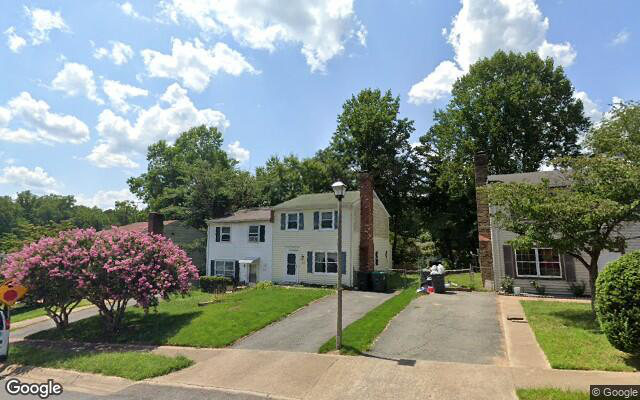

In [ ]:
col_image = PIL.Image.open(str(COL_light[7]))
col_image

In [ ]:
col_np = np.asarray(col_image)
col_np.shape

(400, 640, 3)

### Split the data into a training and validation set

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, labels='inferred', label_mode="categorical", image_size=(400, 640), class_names=None, color_mode='rgb', batch_size=32, shuffle=True, seed=42, validation_split=0.2, subset="training",
    interpolation='bilinear', follow_links=False
)

Found 2007 files belonging to 4 classes.
Using 1606 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, labels='inferred', label_mode="categorical",image_size=(400, 640), class_names=None, color_mode='rgb', batch_size=32, shuffle=True, seed=42, validation_split=0.2, subset="validation",
    interpolation='bilinear', follow_links=False
)

Found 2007 files belonging to 4 classes.
Using 401 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Colonial Streetlights', 'Enclosed Streetlights', 'Non-Streetlights', 'Open Streetlights']


### Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Resize and Rescale

In [ ]:
IMG_SIZE = 256

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)], name="resize_and_rescale"
)

### Create and Compile Model

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
  resize_and_rescale,
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', name="layer1"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', name="layer2"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', name="layer3"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', name="layer4"),
  tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output")
])

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train Model

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
51/51 [==============================] - 118s 2s/step - loss: 1.2674 - accuracy: 0.4904 - val_loss: 0.8751 - val_accuracy: 0.6459
Epoch 2/10
51/51 [==============================] - 96s 2s/step - loss: 0.8848 - accuracy: 0.6694 - val_loss: 0.8175 - val_accuracy: 0.6559
Epoch 3/10
51/51 [==============================] - 96s 2s/step - loss: 0.8184 - accuracy: 0.6853 - val_loss: 0.8316 - val_accuracy: 0.6658
Epoch 4/10
51/51 [==============================] - 96s 2s/step - loss: 0.7332 - accuracy: 0.7090 - val_loss: 0.8112 - val_accuracy: 0.6309
Epoch 5/10
51/51 [==============================] - 96s 2s/step - loss: 0.6512 - accuracy: 0.7446 - val_loss: 0.7627 - val_accuracy: 0.6833
Epoch 6/10
51/51 [==============================] - 96s 2s/step - loss: 0.3288 - accuracy: 0.8855 - val_loss: 0.9066 - val_accuracy: 0.6559
Epoch 7/10
51/51 [==============================] - 97s 2s/step - loss: 0.1857 - accuracy: 0.9443 - val_loss: 1.0717 - val_accuracy: 0.6110
Epoch 8/10
51/51 [=

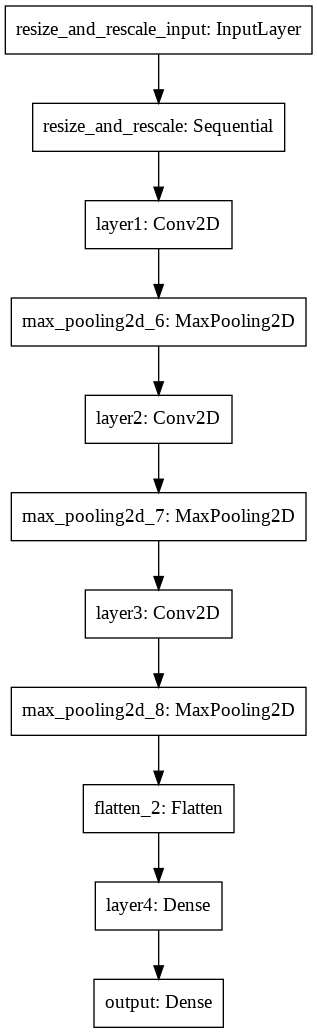

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png')

### Visualize Results

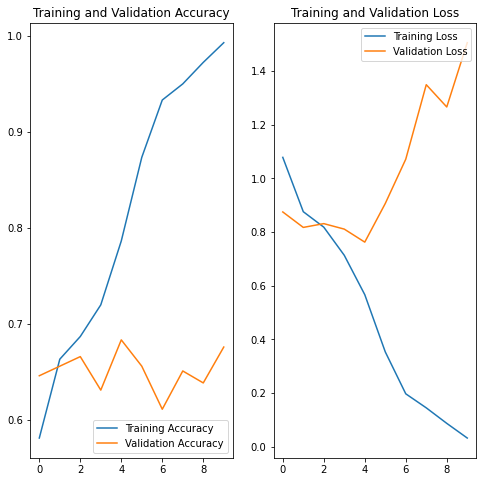

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
class_pred = model.predict_classes(val_ds)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from collections import Counter

In [ ]:
Counter(class_pred.tolist())

Counter({0: 91, 1: 242, 2: 58, 3: 10})

In [ ]:
class_names

['Colonial Streetlights',
 'Enclosed Streetlights',
 'Non-Streetlights',
 'Open Streetlights']

### Save Model

In [ ]:
model_version = "0001"
model_name = "streetlight_baseline"
model_path = os.path.join(model_name, model_version)

In [ ]:
tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: streetlight_baseline/0001/assets


In [ ]:
!saved_model_cli show --dir streetlight_baseline/0001 --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['resize_and_rescale_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 400, 640, 3)
        name: serving_default_resize_and_rescale_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['output'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 4)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W0508 15:51:54.918896 140173679454080 deprecation.py:506] From /usr/local/lib/python2.7/dist-pack

### Test the Saved Model

In [ ]:
encl_new = PIL.Image.open(str('_h-zyZhP8YvU8aBMnmt67g.jpg'))

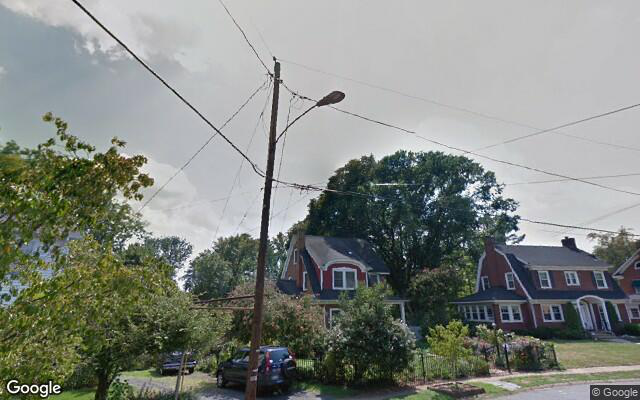

In [ ]:
encl_new

In [ ]:
encl_np = np.asarray(encl_new)
encl_np = np.expand_dims(encl_np, axis=0)
encl_np.shape

(1, 400, 640, 3)

In [ ]:
np.save('image_test.npy', encl_np)

In [ ]:
!saved_model_cli show --dir streetlight_baseline/0001 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['resize_and_rescale_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 400, 640, 3)
      name: serving_default_resize_and_rescale_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['output'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 4)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [ ]:
!saved_model_cli run --dir streetlight_baseline/0001 --tag_set serve \
                     --signature_def serving_default \
                     --inputs resize_and_rescale_input=image_test.npy

2021-05-08 15:58:09.575657: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-05-08 15:58:09.586808: E tensorflow/stream_executor/cuda/cuda_driver.cc:351] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-08 15:58:09.586866: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (272240086da8): /proc/driver/nvidia/version does not exist
2021-05-08 15:58:09.592971: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2021-05-08 15:58:09.593229: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x558e9d313100 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-05-08 15:58:09.593267: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
W0508 15:58:09.594976 139950848493440 deprecation.py:323]

### Save model as HDF5

In [ ]:
!pip install -q pyyaml h5py

In [ ]:
model.save('baseline_v1.h5')